## Example 8.4: Mean Drug Response
The effect of drugs and alcohol on the nervous system has been the subject of considerable research recently. Suppose a research neurologist is testing the effect of a drug on response time by injecting 100 rats with a unit of dose of the drug, subjecting each to neurological stimulus, and recording its response time. The neurologist knows that the mean response time for rats not injected with the drug (the "control" mean) is 1.2 seconds. She wishes to test whether the mean response time for the drug-injected rats differs from 1.2 seconds. Set up  the test of hypothesis for the experiment, using $\alpha = 0.01$.  

1. What is the null hypothesis and the alternative hypothesis?
 

$H_0 : \mu = \mu_0 = 1.2 s$ 

$H_a : \mu \neq \mu_0 $

It is a two-tailed test. 

2. What is the rejection region?

As $n \geq 30$ we use the large-sample test and hence the z-statistic. Let's find $ z_{\alpha/2}$ such that $P(|z| > z_{\alpha/2}) = \alpha = 0.01$.



z1:  2.5758293035489004


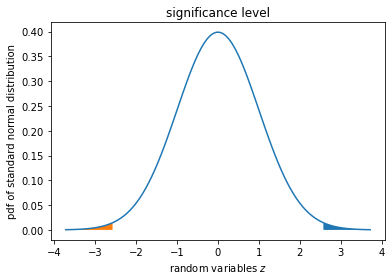

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline

# Freeze the parameters of the standard normal distribution
rv = sts.norm()
z1 = rv.ppf(0.99+0.005)
print('z1: ',z1)
fig1 = plt.figure()
zz = np.linspace(rv.ppf(0.0001),rv.ppf(0.9999), 100)
plt.plot(zz,rv.pdf(zz))
plt.title(r'significance level')
plt.xlabel(r'random variables $z$')
plt.ylabel('pdf of standard normal distribution')
part1 = np.linspace(z1,rv.ppf(0.9999), 100)
part2 = np.linspace(rv.ppf(0.0001),-z1, 100)
plt.fill_between(part1,rv.pdf(part1))
plt.fill_between(part2,rv.pdf(part2))

plt.show()

$P(|z| > 2.576) = \alpha = 0.01$

3. Let's load the data and calculate the sample mean and sample standard deviation.


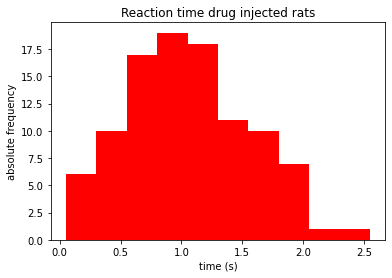

sample mean:  1.0516999999999999
standard devitation sample (unbiased):  0.4982232167787584
number of observations in the sample:  100
standard devitation sample mean (standard error of the mean):  0.04982232167787584


In [2]:
df = pd.read_csv('DRUGRAT.CSV')
#print(df)
plt.figure()
plt.hist(df['TIME'], bins=10, color='r')
plt.title('Reaction time drug injected rats')
plt.xlabel('time (s)')
plt.ylabel('absolute frequency')
plt.show()
xb = df['TIME'].mean()
s = df['TIME'].std(ddof = 1)
n = len(df)
sm = s / np.sqrt(n)
print('sample mean: ',xb)
print('standard devitation sample (unbiased): ',s)
print('number of observations in the sample: ',n)
print('standard devitation sample mean (standard error of the mean): ',sm)

4. Calculate the z-statistic.


In [3]:
mu0 = 1.2
z = (xb - mu0) / sm
print('z-statistic: ',z)
print('in rejection region? ',np.abs(z)>z1)


z-statistic:  -2.976577465795906
in rejection region?  True


5. Conclusion of the large-sample test.
Statistical conclusion:
We reject the null hypothesis in favor of the alternative hypothesis at a $\alpha = 0.01$ level of significance.
Practical conclusion:
The population mean of the reaction time of drug induced rats differ from 1.2 seconds at a $\alpha = 0.01$ level of significance.

6. What is the observed significance level?
$P(|z|>2.977) = 2 P(z < -2.977)$



p-value:  0.0029148543229331305


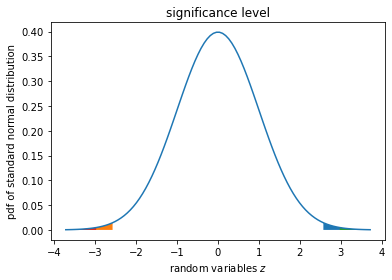

In [4]:
print('p-value: ',2*rv.cdf(-np.abs(z)))


plt.figure(fig1)
part1 = np.linspace(-z,rv.ppf(0.9999), 100)
part2 = np.linspace(rv.ppf(0.0001),z, 100)
plt.fill_between(part1,rv.pdf(part1))
plt.fill_between(part2,rv.pdf(part2))
plt.show()

7. Assume that only the first 6 observetions are available. Construct the rejection region and perform the test.

THe sample size is smaller than 30, hence we need to us the student's t test.

Check out the selection of a subset of rows in dataframes:
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html



   TIME
0  1.90
1  2.17
2  0.61
3  1.17
4  0.66
5  1.86
t1:  4.032142983557536


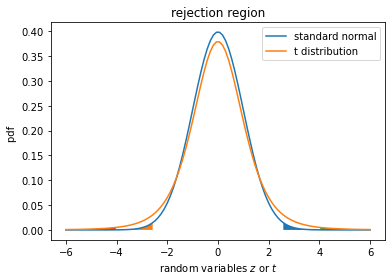

In [5]:
df1 = df.iloc[0:6]
print(df1)
n1 = len(df1)
rvt = sts.t(n1-1)
t1 = rvt.ppf(0.99+0.005)
print('t1: ',t1)

plt.figure()
tt = np.linspace(-6,6, 100)
# standard normal distribution
plt.plot(tt,rv.pdf(tt),label = 'standard normal')
plt.title(r'rejection region')
plt.xlabel(r'random variables $z$ or $t$')
plt.ylabel('pdf ')
part1 = np.linspace(z1,6, 100)
part2 = np.linspace(-6,-z1, 100)
plt.fill_between(part1,rv.pdf(part1))
plt.fill_between(part2,rv.pdf(part2))
# t distribution rvt
plt.plot(tt,rvt.pdf(tt),label = 't distribution')
part1 = np.linspace(t1,6, 100)
part2 = np.linspace(-6,-t1, 100)
plt.fill_between(part1,rvt.pdf(part1))
plt.fill_between(part2,rvt.pdf(part2))
plt.legend()
plt.show()

In [6]:
xb1 = df1['TIME'].mean()
s1 = df1['TIME'].std(ddof = 1)

sm1 = s1 / np.sqrt(n1)
print('sample mean: ',xb1)
print('standard devitation sample (unbiased): ',s1)
print('number of observations in the sample: ',n1)
print('standard devitation sample mean: ',sm1)


mu0 = 1.2
t = (xb1 - mu0) / sm1
print('t-statistic: ',t)
print('in rejection region? ',np.abs(t)>t1)

sample mean:  1.3950000000000002
standard devitation sample (unbiased):  0.675122211158839
number of observations in the sample:  6
standard devitation sample mean:  0.2756174885597792
t-statistic:  0.7075022743257686
in rejection region?  False


Statistical conclusion: We have insufficient evidence to reject the null hypothesis at $\alpha = 0.01$ level of significance.